In [72]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch import nn

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
        #t = F.softmax(t, dim=1)
    
# Create a DataLoader for your dataset
batch_size = 2
path='/Algorithm_Trading_01/DATA/Train/'
transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224),transforms.ToTensor()])

Dataset = datasets.ImageFolder(path, transform=transform) 
dataloader = torch.utils.data.DataLoader(Dataset, shuffle=True)

from torch.optim import Adam 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss() # Doesn't have sigmoid funciton
# loss_fn=torch.nn.BCELoss() # has sigmoid function BUILD  in
optimizer = Adam(net.parameters(), lr=0.001)

from torch.utils.data import random_split

# Calculate the size of the training and validation sets
dataset_size = len(Dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

# # Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(Dataset, [train_size, val_size])

# # Create DataLoaders for the training and validation sets
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




In [85]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "../myFirstModel.pth"
    torch.save(net.state_dict(), path)
     # in the jupyter ./ and / is the same directory that our folder is and ../ is a step back from the original directory
saveModel()

"""
 # where are we excatly
# cwd = os.getcwd()
# print("Current working directory:", cwd)

"""
# # Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    net.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = net(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    net.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
            
            net.train()
            # Makes predictions
            yhat = net(images)
            # Computes loss
            # torch.argmax(yhat,dim=0
            loss = loss_fn(yhat,labels)
            # Computes gradients
            # loss.backward()
            # Updates parameters and zeroes gradients
            optimizer.step()
            optimizer.zero_grad()
            print(torch.argmax(yhat,dim=1),labels)
            
            
train(5)

The model will be running on cpu device
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([1])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])


KeyboardInterrupt: 

In [166]:
 
a=torch.tensor([[0.5209, 0.5049],[0.5209, 0.5049]])
        
torch.argmax(a,dim=0)


tensor([0, 0])

134

Trying ot deal with the My Dataset class:

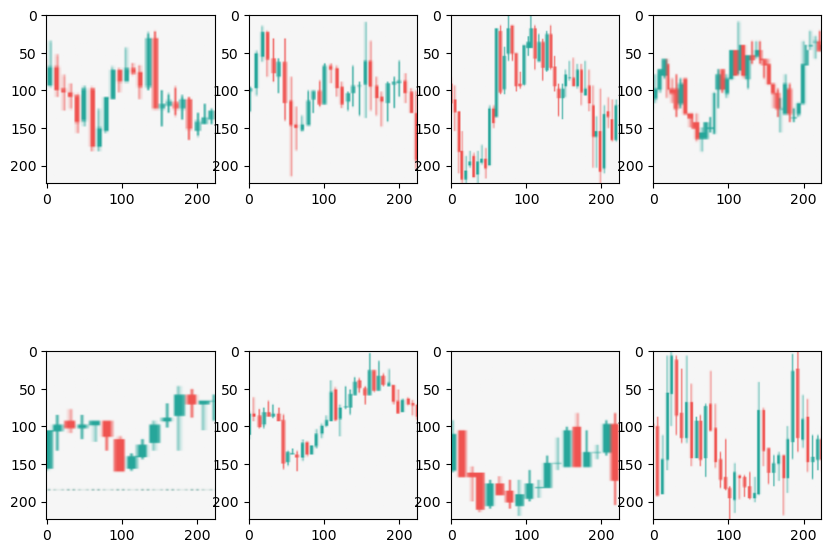

In [24]:
from os import walk
import cv2 as cv
from torchvision import datasets, transforms
from PIL import Image
import torch


path_iamge_0='A:\Algorithm_Trading_01\DATA\Train'


# img=cv.imread(image_0) # Turn the image path to numpy array format also RGB type
# # img_2= Image.open(image_0) # Open the Image for plotting, also can plot with matplotlib -> (imshow method)
# # plt.imshow(img_2)
# # print(image_0)

# ta=transforms.Compose([transforms.ToTensor()]) # Can turn the image or tensor to Tensor format
transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224),transforms.ToTensor()])

Dataset = datasets.ImageFolder(path_iamge_0, transform=transform) 
dataloader = torch.utils.data.DataLoader(Dataset, shuffle=True)

# fig,axes=plt.subplots(figsize=(10,8),ncols=4,nrows=2)
# row = 0
# col = 0

# for index in range(8):
#     images, labels = next(iter(dataloader))
#     ax = axes[row,col] # row,col
#     ax.imshow(images[0].permute(1,2,0))

#     col+=1
#     if col==4:
#         row+=1
#         col=0
# # x,y=next(iter(dataloader))

tensor(0)

In [35]:
from torch.utils.data import random_split

# Calculate the size of the training and validation sets
dataset_size = len(Dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(Dataset, [train_size, val_size])

# Create DataLoaders for the training and validation sets
batch_size = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


'A:/Algorithm_Trading_01/DATA/copy_Train//copy_rising_wedge/'

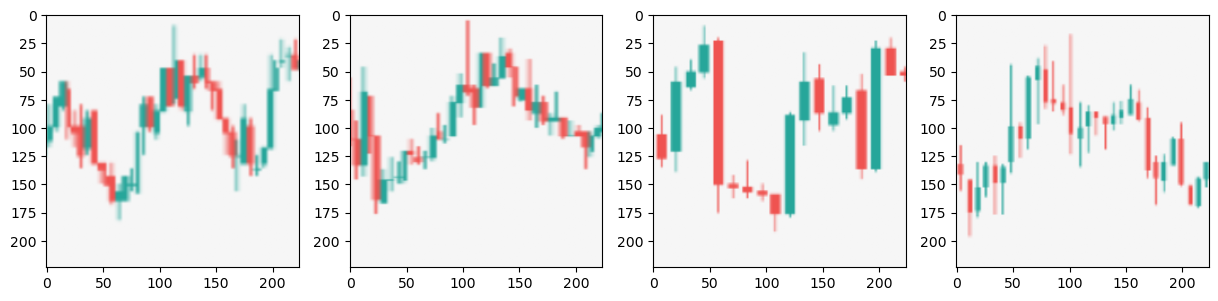

In [95]:
dataloader = torch.utils.data.DataLoader(Dataset, shuffle=True)

# plt.imshow(images[0].permute(1,2,0))
fig, axes = plt.subplots(figsize=(15,5), ncols=4)
for ii in range(4):
    images, labels = next(iter(dataloader))
    ax = axes[ii] # Define the every axis
    ax.imshow(images[0].permute(1,2,0)) # plot every chart in 4 axis. 